<a href="https://colab.research.google.com/github/cserock/colab-examples/blob/main/02_%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0_XOR_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab을 사용한 퍼셉트론으로 XOR 문제 해결 예제

## XOR 문제 구성
- 배열 크기: (50,)  
- 값의 범위: low 이상, high 미만  
- 분포: 균등분포 (모든 값이 나올 확률이 같음)

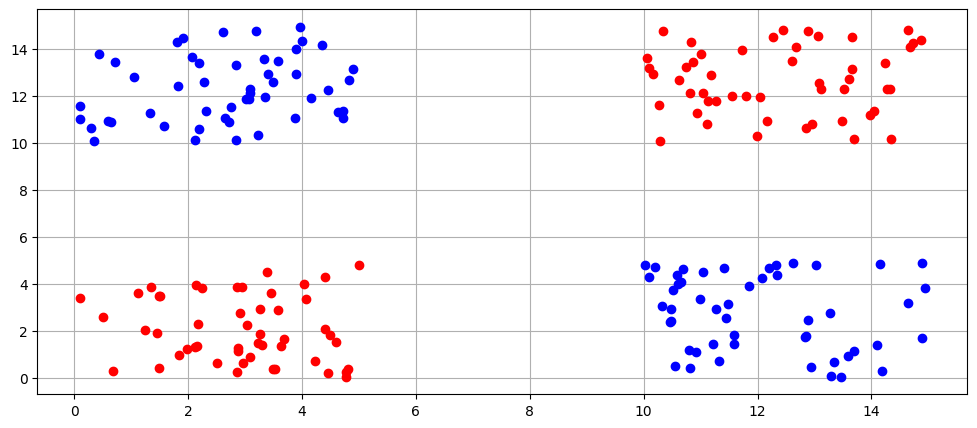

In [1]:
### XOR 문제 구성 ###
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

x11 = np.random.uniform(low=0, high=5, size=(50,))
x12 = np.random.uniform(low=10, high=15, size=(50,))
x21 = np.random.uniform(low=0, high=5, size=(50,))
x22 = np.random.uniform(low=10, high=15, size=(50,))



x1 = np.append(x11, x12)
x2 = np.append(x21, x22)

y11 = np.random.uniform(low=10, high=15, size=(50,))
y12 = np.random.uniform(low=0, high=5, size=(50,))
y21 = np.random.uniform(low=0, high=5, size=(50,))
y22 = np.random.uniform(low=10, high=15, size=(50,))

y1 = np.append(y11, y12)
y2 = np.append(y21, y22)

x_1 = np.vstack([x1, y1]).T
x_2 = np.vstack([x2, y2]).T

y_1 = np.ones_like(x_1[:, 0])
y_2 = np.zeros_like(x_2[:, 0])
x = np.vstack([x_1, x_2])
y = np.hstack([y_1, y_2])


fig, ax = plt.subplots(figsize = (12,5))
ax.plot(x_1[:, 0], x_1[:,1], 'bo')
ax.plot(x_2[:,0], x_2[:,1], 'ro')
ax.grid()


## XOR 문제 해결하기(단층 퍼셉트론)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.4853 - loss: 9.2037
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4885 - loss: 7.1188 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5275 - loss: 4.6609 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4964 - loss: 3.2104 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5248 - loss: 1.4388 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5251 - loss: 0.7529 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5759 - loss: 0.7402 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7552 - loss: 0.6946 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5116 - loss: 0.7127 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5083 - loss: 0.7173 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5929 - loss: 0.7043 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5820 - los

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


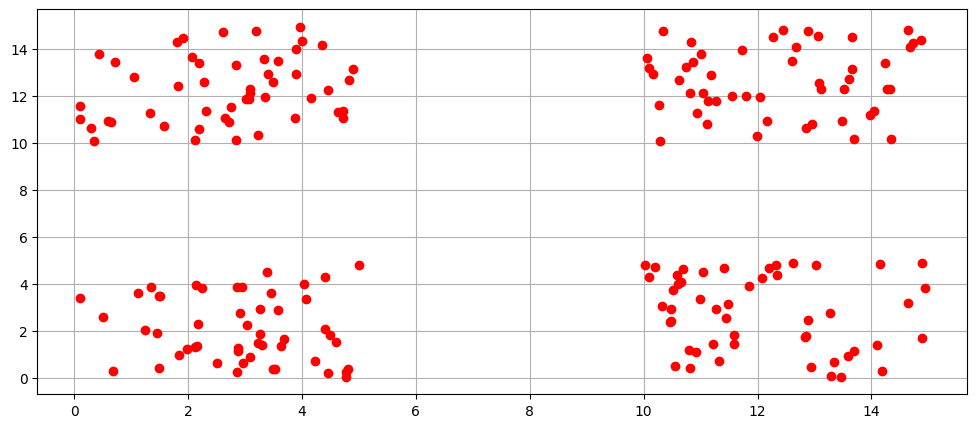

In [4]:
### XOR 문제 해결시켜보기(단층 퍼셉트론) ###
import tensorflow as tf

model = tf.keras.models.Sequential([
    # 한 개의 층으로만 구성
    tf.keras.layers.Dense(1, input_dim=2, activation='sigmoid')
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x, y, epochs=100, verbose=1)

preds = model.predict(x)
preds_1d = preds.flatten()
pred_class = np.where(preds_1d > 0.5, 1 , 0)

y_true = x[pred_class==1]
y_false = x[pred_class==0]

fig, ax = plt.subplots(figsize = (12,5))
ax.plot(y_true[:, 0], y_true[:,1], 'bo')
ax.plot(y_false[:,0], y_false[:,1], 'ro')
ax.grid()


## XOR 문제 해결하기(다층 퍼셉트론)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.6902 - loss: 0.7076
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5196 - loss: 0.5768 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7662 - loss: 0.4919 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7414 - loss: 0.4543 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7821 - loss: 0.4328 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8815 - loss: 0.3711 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9051 - loss: 0.3502 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9315 - loss: 0.3188 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9387 - loss: 0.2911 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9307 - loss: 0.2556 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9065 - loss: 0.2700 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9125 - los

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


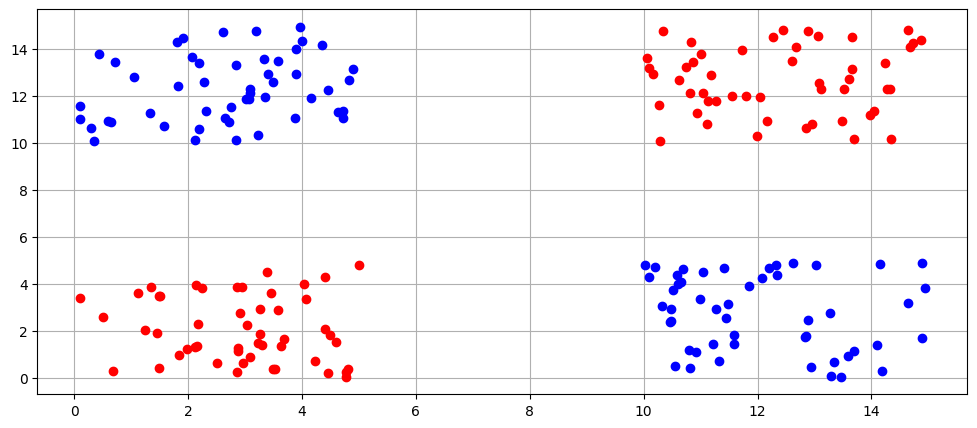

In [5]:
### XOR 문제 해결시켜보기(다층 퍼셉트론) ###

# 1) 모델 정의 (은닉층 활성화 함수 ReLU, 출력층 sigmoid)
# model = tf.keras.models.Sequential([
#     # 여러 개의 층으로 구성
#     tf.keras.layers.Dense(8, input_dim=2, activation='sigmoid'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# 2) 옵티마이저와 sgd 사용
# model.compile(optimizer='sgd',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])


# 1) 모델 정의 (은닉층 활성화 함수 ReLU, 출력층 sigmoid)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, input_dim=2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2) 옵티마이저와 학습률 명시, 성능 향상을 위해 Adam 사용
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x, y, epochs=100, verbose=1)

preds = model.predict(x)
preds_1d = preds.flatten()
pred_class = np.where(preds_1d > 0.5, 1 , 0)

y_true = x[pred_class==1]
y_false = x[pred_class==0]

fig, ax = plt.subplots(figsize = (12,5))
ax.plot(y_true[:, 0], y_true[:,1], 'bo')
ax.plot(y_false[:,0], y_false[:,1], 'ro')
ax.grid()